In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


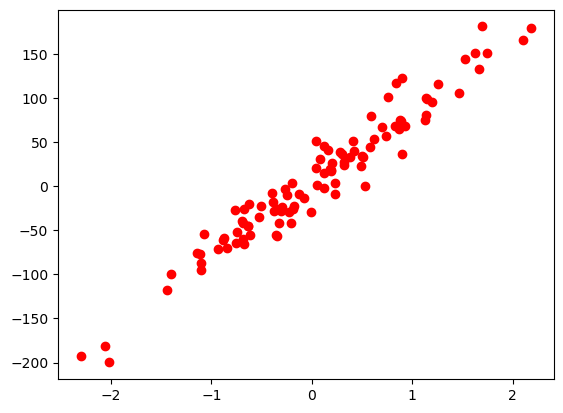

In [8]:
# 1. prepare data
X_numpy,y_numpy=datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)
x=torch.from_numpy(X_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))
y=y.view(y.shape[0],1)
n_samples,n_features=x.shape
#plot data
plt.plot(X_numpy,y_numpy,'ro')




In [ ]:
#2. model
input_size=n_features
output_size=1
model=nn.Linear(input_size,output_size)




In [10]:
#3. loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [12]:
#4. traning the model
num_epochs = 100
for epoch in range(num_epochs):
    # Varibale=torch.Tensor(X_train)
    # X_train = Variable(torch.Tensor(X_train))
    # y_train = Variable(torch.Tensor(y_train))
    # forward pass and loss
    y_predicted = model(x)
    loss = criterion(y_predicted, y)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    
    # empty the gradients
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 4336.8706
epoch: 20, loss = 3238.9417
epoch: 30, loss = 2443.8057
epoch: 40, loss = 1867.3812
epoch: 50, loss = 1449.1226
epoch: 60, loss = 1145.3712
epoch: 70, loss = 924.6046
epoch: 80, loss = 764.0351
epoch: 90, loss = 647.1712
epoch: 100, loss = 562.0644


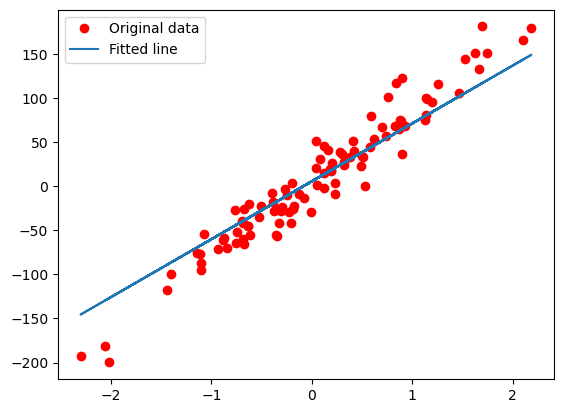

In [13]:
#5. plot the loss curve  
predicted=model(x).detach().numpy()
plt.plot(x.numpy(),y.numpy(),'ro',label='Original data')
plt.plot(x.numpy(),predicted,label='Fitted line')
plt.legend()
plt.show()

